In [224]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

In [225]:
driver = webdriver.Safari()
driver.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html")
table = driver.find_element("xpath", "//table")

instances = [] # Add all rows data 

# Extract data from the table rows and columns
rows = table.find_elements("tag name", "tr")
for row in rows:
    columns = row.find_elements("tag name", "td")
    row_data = [column.text for column in columns]
    instances.append(row_data)
    # print("Row Data:", row_data) ##print, if you want to see data on the go

# Close the browser window
driver.quit()

In [226]:
instances.pop(0)#remove the empty list

[]

In [227]:
np.shape(instances) #check the shape of instances 

(50, 8)

In [228]:
colums_name = ["rank", "x_class", "date", "region", "start_time", "max_time", "end_time", "movie"] #defining the colums name

In [229]:
# lets change to ndarray 
instances = np.array(instances)
colums_name = np.array(colums_name)

In [230]:
# now we have to transpose the instances matrix to fit into pandas dataframe
instances = np.transpose(instances)

In [231]:
df_solar_top50 = pd.DataFrame(instances, colums_name)

In [232]:
# now we have to transpose again to make in the proper format
df_solar_top50 = np.transpose(df_solar_top50)

In [233]:
df_solar_top50.head(10) #  showing the checkpoint of the project 

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive
5,6,X14.36,2003/10/29,0486,20:37,20:49,21:01,View archive
6,7,X13.37,2017/09/06,2673,11:53,12:02,12:10,View archive
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01,View archive
8,9,X12.95,2006/12/05,0930,10:18,10:35,10:45,View archive
9,10,X11.96,2003/11/02,0486,17:03,17:25,17:39,View archive


In [234]:
df_solar_top50.drop("movie", inplace = True, axis = 1) # drop the unnecessary column.

In [235]:
df_solar_top50.isnull().sum() # check if there are any null values or not.

rank          0
x_class       0
date          0
region        0
start_time    0
max_time      0
end_time      0
dtype: int64

In [236]:
df_solar_top50["start_datetime"] = pd.to_datetime(df_solar_top50["date"] + " " + df_solar_top50["start_time"]) # make a new column of datetime object contains date and start_time from previous columns

In [237]:
df_solar_top50["max_datetime"] = pd.to_datetime(df_solar_top50["date"] + " " + df_solar_top50["max_time"]) # make a new column consisting of max_time and today date with pandas datetime object

In [238]:
df_solar_top50["end_datetime"] = pd.to_datetime(df_solar_top50["date"] + " " + df_solar_top50["end_time"]) # make a new column consisting of end_time and today date with pandas datetime object

In [239]:
df_solar_top50.drop(["date", "start_time"], inplace = True, axis = 1) # drop the unnecessary columns

In [240]:
df_solar_top50.drop(["max_time", "end_time"], inplace = True, axis = 1) # drop the unnecessary columns

In [241]:
df_solar_top50.head(10) # showing the checkpoint of the project

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X40+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X14.36,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X13.37,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,8,X12.97,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,9,X12.95,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X11.96,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [242]:
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html' # URL of the page containing the table

response = requests.get(url)# Send a GET request to the page

soup = BeautifulSoup(response.content, 'html.parser')# Parse the page content with BeautifulSoup

pre_text = soup.find('pre').get_text() # The table is inside <pre> tag in this webpage

data = pre_text.strip().splitlines()[10:] # collecting important data 

rows = []

for row in data:
    rows.append([x for x in row.split(" ") if len(x) != 0][:15])  # remove unnecessary space from the rows

rows.pop()   # remove unnecessary row
np.shape(rows) 

columns = ["start_date","start_time","end_date","end_time","start_frequency", "end_frequency", "flare_location", "flare_region", "importance", "date", "time", "cpa", "width", "speed", "plots"]

In [243]:
np.shape(columns)

(15,)

In [244]:
df = pd.DataFrame(np.transpose(rows), columns) # transpose rows to fit data into dataframe
df = np.transpose(df) # now again transpose for proper fromatting.

In [245]:
df.replace('------', np.nan, inplace = True) # Replace dash value into NAN value

In [246]:
df.replace('-----', np.nan, inplace = True) # Replace dash value into nan values
df.replace('----', np.nan, inplace = True)
df.replace('--:--', np.nan, inplace = True)
df.replace('--/--', np.nan, inplace = True)


In [247]:
df # checkpoint of the project

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,date,time,cpa,width,speed,plots
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2023/05/05,08:04,05/05,08:50,14000,1300,N14E32,13296,M2.1,05/05,08:00,Halo,360,770,PHTX
599,2023/05/07,22:57,05/08,00:10,14000,600,N16W06,13296,M1.6,05/07,23:12,Halo,360,1075,PHTX
600,2023/05/09,18:51,05/09,20:20,16000,1250,N13W31,13296,M4.2,05/09,19:00,Halo,360,1209,PHTX
601,2023/06/17,10:37,06/17,10:42,14000,5500,S22E85,EP,NaN,06/17,10:48,113,154,570,PHTX


In [ ]:
# changing into datetime object

df["start_datetime"]=pd.to_datetime(df.start_date + " " + df.start_time)

df.replace("24:00", "00:00", inplace = True)

df["End_datetime"] = pd.to_datetime(df.start_date + " " + df.end_time)

df["Cme_datetime"]=pd.to_datetime(df.start_date + " " + df.time)

df.drop(["start_date", "start_time"], axis = 1, inplace = True)

df.drop(["end_date", "end_time"], axis = 1, inplace = True)

df.drop(["date", "time"], axis = 1, inplace = True)

# change halo columns and add new halo column as boolean
df["is_halo"] = df["cpa"] == "Halo"

df.replace("Halo", np.nan, inplace = True)

print(df.width)

In [258]:
df.width.fillna(-1, inplace = True)

/var/folders/p6/vndmwsg51dz3c3wg9s0xj2g00000gn/T/ipykernel_1820/2490307248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.width.fillna(-1, inplace = True)


In [259]:
width_boolean = []
for x in df.width:
    try:
        if int(x):
            width_boolean.append(False)
    except:
        width_boolean.append(True)

In [260]:
df.width.replace(-1, np.nan, inplace = True)

In [261]:
df["width_lower_bound"] = width_boolean

In [262]:
df = df[["start_datetime", "End_datetime", "start_frequency", "end_frequency", 'flare_location', 'flare_region', 'importance','Cme_datetime', 'cpa', 'width', 'speed', 'plots', 'is_halo', 'width_lower_bound']]

In [263]:
df #checkpoint of the project 

,start_datetime,End_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,Cme_datetime,cpa,width,speed,plots,is_halo,width_lower_bound
0,1996-05-15 05:45:00,1996-05-15 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,PHTX,False,False
1,1997-01-20 08:56:00,1997-01-20 09:02:00,14000,12000,NaN,NaN,NaN,1997-01-20 09:31:00,281,72,175,PHTX,False,False
2,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
3,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
4,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2023-05-05 08:04:00,2023-05-05 08:50:00,14000,1300,N14E32,13296,M2.1,2023-05-05 08:00:00,NaN,360,770,PHTX,True,False
599,2023-05-07 22:57:00,2023-05-07 00:10:00,14000,600,N16W06,13296,M1.6,2023-05-07 23:12:00,NaN,360,1075,PHTX,True,False
600,2023-05-09 18:51:00,2023-05-09 20:20:00,16000,1250,N13W31,13296,M4.2,2023-05-09 19:00:00,NaN,360,1209,PHTX,True,False
601,2023-06-17 10:37:00,2023-06-17 10:42:00,14000,5500,S22E85,EP,NaN,2023-06-17 10:48:00,113,154,570,PHTX,False,False


In [264]:
#part 2 Analysis

In [265]:
df.sort_values(by = ['importance'], ascending=False )

,start_datetime,End_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,Cme_datetime,cpa,width,speed,plots,is_halo,width_lower_bound
10,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
525,2017-09-06 12:05:00,2017-09-06 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
339,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False
248,2003-11-02 17:30:00,2003-11-02 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False
526,2017-09-10 16:02:00,2017-09-10 06:50:00,16000,150,S09W92,12673,X8.2,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2023-02-11 12:00:00,2023-02-11 18:20:00,5500,190,N34E24,EP,NaN,2023-02-11 11:12:00,NaN,360,1498,PHTX,True,False
587,2023-02-21 20:23:00,2023-02-21 20:29:00,8200,2700,NE90b,DIM,NaN,2023-02-21 20:48:00,55,69,413,PHTX,False,False
590,2023-03-13 03:41:00,2023-03-13 09:50:00,11900,200,E90b,DIM,NaN,2023-03-13 03:36:00,NaN,360,1699,PHTX,True,False
593,2023-03-28 00:08:00,2023-03-28 00:30:00,14000,5600,NW90b,DIM,NaN,2023-03-28 23:36:00,298,227,622,PHTX,False,False


In [266]:
df[df["importance"] == "X28."]

,start_datetime,End_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,Cme_datetime,cpa,width,speed,plots,is_halo,width_lower_bound
251,2003-11-04 20:00:00,2003-11-04,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False


In [267]:
# add a colomn that sort the table on the basis of sorte_value colomn 
sorte_value = []
for x in df['importance']:
    if x is np.nan:
        sorte_value.append(x)
    
    elif x[0] != "X":
        sorte_value.append(0)
    else:
        sorte_value.append(float(x[1:]))


In [268]:
df["sort_imp"] = sorte_value

/var/folders/p6/vndmwsg51dz3c3wg9s0xj2g00000gn/T/ipykernel_1820/3422020659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sort_imp"] = sorte_value


In [269]:
df_nasa_top50 = df.nlargest(50, "sort_imp")

In [270]:
df_nasa_top50.reset_index(inplace = True)

In [271]:
df_nasa_top50.drop("sort_imp", axis = 1, inplace = True)

In [272]:
# replicaiton of nasa top 50 solar flares on the basis of Importance feature 
df_nasa_top50.head(10) 

,index,start_datetime,End_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,Cme_datetime,cpa,width,speed,plots,is_halo,width_lower_bound
0,251,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
1,129,2001-04-02 22:05:00,2001-04-02 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
2,244,2003-10-28 11:10:00,2003-10-28 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
3,138,2001-04-15 14:05:00,2001-04-15 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
4,245,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
5,10,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
6,525,2017-09-06 12:05:00,2017-09-06 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
7,339,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False
8,248,2003-11-02 17:30:00,2003-11-02 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False
9,526,2017-09-10 16:02:00,2017-09-10 06:50:00,16000,150,S09W92,12673,X8.2,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False


In [273]:
df_solar_top50.head(10)

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X40+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X14.36,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X13.37,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,8,X12.97,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,9,X12.95,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X11.96,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [275]:
# Other thing is that Nasa solar flare data have more features about the solar flares than spaceWeatherLive but we couldn't reach at conclusions from the data above because the lack of data integrity.

In [393]:
# function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data

In [395]:
def find_best_match(df_solar_top50, df_nasa_top50):

  matches = []
  for _, row_spaceweather in df_solar_top50.iterrows():
    best_match_nasa = None
    min_time_diff = float('inf')

    for _, row_nasa in df_nasa_top50.iterrows():
      if row_spaceweather['start_datetime'].date() == row_nasa['start_datetime'].date():
          time_diff = abs((row_spaceweather['start_datetime'] - row_nasa['start_datetime']).total_seconds())
          if time_diff < min_time_diff:
            min_time_diff = time_diff
            best_match_nasa = row_nasa

    if best_match_nasa is not None:
      matches.append(best_match_nasa)
  
  return pd.DataFrame(matches)


# Find the best matches 
matched_df = find_best_match(df_solar_top50, df_nasa_top50)

# Print the result
print(matched_df)


    index      start_datetime        End_datetime start_frequency  \
0     251 2003-11-04 20:00:00 2003-11-04 00:00:00           10000   
1     129 2001-04-02 22:05:00 2001-04-02 02:30:00           14000   
2     244 2003-10-28 11:10:00 2003-10-28 00:00:00           14000   
3     138 2001-04-15 14:05:00 2001-04-15 13:00:00           14000   
4     245 2003-10-29 20:55:00 2003-10-29 00:00:00           11000   
6     525 2017-09-06 12:05:00 2017-09-06 08:00:00           16000   
5      10 1997-11-06 12:20:00 1997-11-06 08:30:00           14000   
7     339 2006-12-05 10:50:00 2006-12-05 20:00:00           14000   
8     248 2003-11-02 17:30:00 2003-11-02 01:00:00           12000   
9     526 2017-09-10 16:02:00 2017-09-10 06:50:00           16000   
10    299 2005-01-20 07:15:00 2005-01-20 16:30:00           14000   
11    370 2011-08-09 08:20:00 2011-08-09 08:35:00           16000   
12    342 2006-12-06 19:00:00 2006-12-06 00:00:00           16000   
13    328 2005-09-09 19:45:00 2005

In [397]:
# Analysis And Visualization 

/var/folders/p6/vndmwsg51dz3c3wg9s0xj2g00000gn/T/ipykernel_1820/2852079923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_datetime'] = pd.to_datetime(df['start_datetime'])


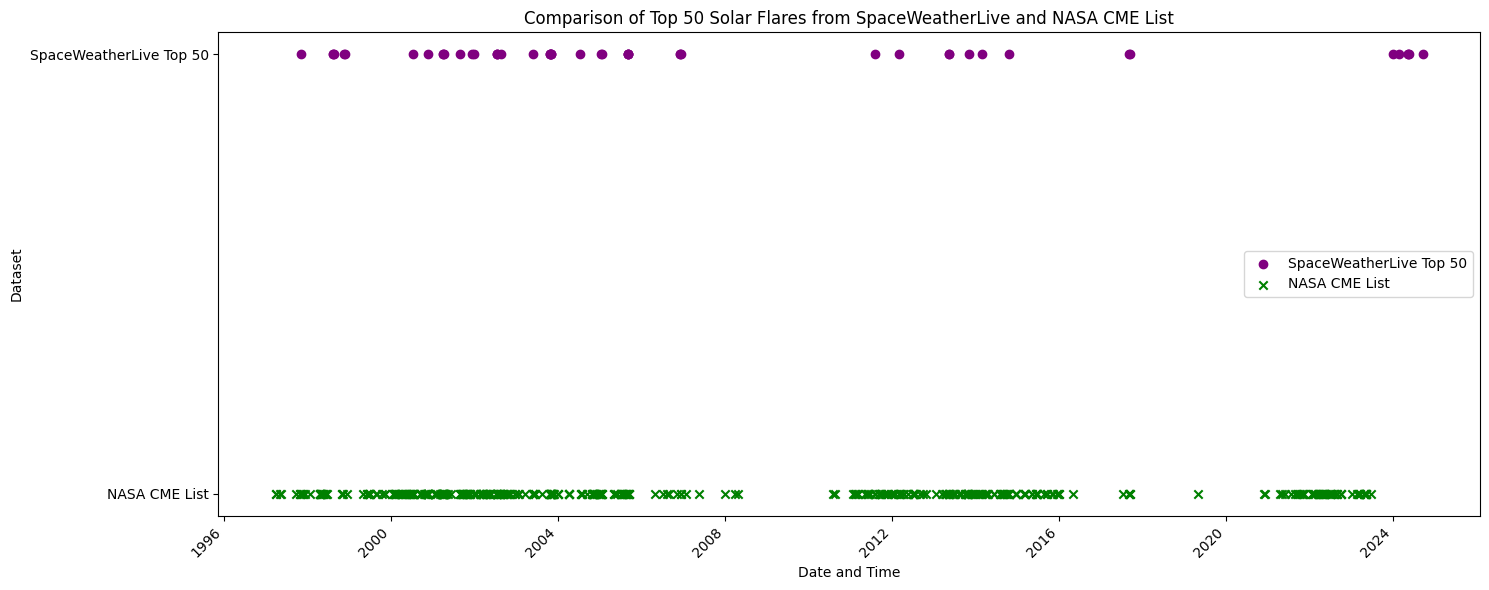

In [401]:
import matplotlib.pyplot as plt

# Convert start_datetime to datetime objects for both dataframes
df_solar_top50['start_datetime'] = pd.to_datetime(df_solar_top50['start_datetime'])
df['start_datetime'] = pd.to_datetime(df['start_datetime'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the start_datetime from df_solar_top50
ax.scatter(df_solar_top50['start_datetime'], [1] * len(df_solar_top50), label='SpaceWeatherLive Top 50', marker='o', color='purple')

# Plot the start_datetime from df
ax.scatter(df['start_datetime'], [0] * len(df), label='NASA CME List', marker='x', color='green')

# Set labels and title
ax.set_xlabel('Date and Time')
ax.set_ylabel('Dataset')
ax.set_title('Comparison of Top 50 Solar Flares from SpaceWeatherLive and NASA CME List')
ax.set_yticks([0, 1])
ax.set_yticklabels(['NASA CME List', 'SpaceWeatherLive Top 50'])

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [402]:
# the conclusion
# Both datesets provide valuable information on solar flares, particularly the NASA one.
# The SpaceWeatherLive dataset focuses on the ranking and details of the top 50 solar flares, including their X-class, date, region, and timings
# The NASA dataset focuses on details like start and end times, frequency range, associated flare information, CME details like CPA, width, and speed.")
# By comparing the two, we can identify strong flares in both datasets. 
# For example, we can cross-reference the flares in SpaceWeatherLive's top 50 the NASA dataset to get a more in-depth understanding of their characteristics, like CME properties and associated flare information.
# Further analysis can involve correlating the 'Importance' from NASA with the 'X-class' from SpaceWeatherLive for a more comprehensive view of flare intensity.")
# It also allows us to see if the top flares in SpaceWeatherLive are consistent with the top flares based on importance in the NASA data.")
# We could also analyze the time difference between the flare onset time and the CME onset time.
# This might give insights into the physical processes connecting the flare with the CME.
# Finally, visualizations of the flare data could be created to facilitate better understanding.
# If both datasets contain highly correlated data, visualizations may be more effective in conveying insights.
